**1. Importing Clean and prepare feedback dataset**

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("feedback.csv")
data.head()


Saving feedback.csv to feedback.csv


,StudentID,Name,Course,Overall_Event_Rating,Speaker_Clarity,Organization,Content_Usefulness,Recommend,Additional_Comments
0,1,Fatima Martin,BA Economics,1,1,2,5,5,Excellent time management.
1,2,Anjali Fernandez,BBA,5,4,2,2,5,"Too long, could be shorter."
2,3,John Taylor,BA Economics,5,5,3,3,3,Speakers were hard to hear at times.
3,4,Nisha Martin,BCom,4,3,2,5,3,"Not clear, ran out of time."
4,5,Daniel Martin,BCA,3,2,1,4,1,Excellent time management.


**2. Analyze ratings (1–5 scale) to find patterns of satisfaction**

In [2]:
print(" Ratings Summary:")
print(data['Overall_Event_Rating'].describe())


 Ratings Summary:
count    500.000000
mean       2.918000
std        1.361979
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Overall_Event_Rating, dtype: float64


In [3]:
print("\n Ratings Counts:")
print(data['Overall_Event_Rating'].value_counts().sort_index())


 Ratings Counts:
Overall_Event_Rating
1     98
2    107
3    117
4     94
5     84
Name: count, dtype: int64


/tmp/ipython-input-4-1967251060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Overall_Event_Rating', data=data, palette=['Blue','Green','Red','Yellow','Pink'])


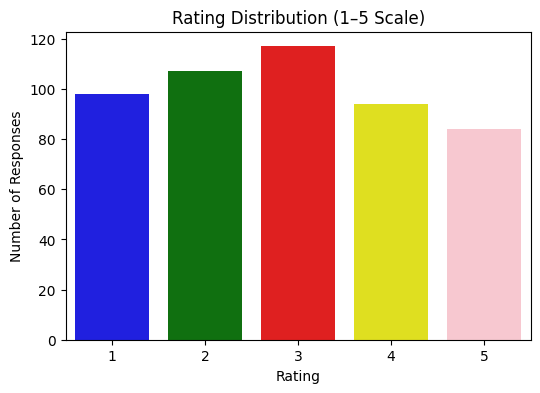

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='Overall_Event_Rating', data=data, palette=['Blue','Green','Red','Yellow','Pink'])
plt.title('Rating Distribution (1–5 Scale)')
plt.xlabel('Rating')
plt.ylabel('Number of Responses')
plt.show()


In [5]:
mean_rating = data['Overall_Event_Rating'].mean()
if mean_rating >= 4:
    print(f"\n Average rating is {mean_rating:.2f}. High overall satisfaction.")
elif mean_rating >= 3:
    print(f"\n Average rating is {mean_rating:.2f}. Mixed/neutral satisfaction.")
else:
    print(f"\n Average rating is {mean_rating:.2f}. Low satisfaction. Needs improvement.")



 Average rating is 2.92. Low satisfaction. Needs improvement.


**3. Use NLP tools to score sentiment in comments (positive/neutral/negative)**

In [6]:
#installing textblob library
!pip install textblob
from textblob import TextBlob

In [7]:
print(data.columns)

Index(['StudentID', 'Name', 'Course', 'Overall_Event_Rating',
       'Speaker_Clarity', 'Organization', 'Content_Usefulness', 'Recommend',
       'Additional_Comments'],
      dtype='object')


In [9]:
def score_sentiment(text):
    if pd.isna(text) or text.strip() == '':
        return 'Neutral'
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

data['additional_comment_sentiment'] = data['Additional_Comments'].apply(score_sentiment)
print(data[['Additional_Comments', 'additional_comment_sentiment']].head())
print(data['additional_comment_sentiment'].value_counts())



                    Additional_Comments additional_comment_sentiment
0            Excellent time management.                     Positive
1           Too long, could be shorter.                      Neutral
2  Speakers were hard to hear at times.                     Negative
3           Not clear, ran out of time.                      Neutral
4            Excellent time management.                     Positive
additional_comment_sentiment
Positive    322
Neutral     128
Negative     50
Name: count, dtype: int64


**4. Visualize trends with beautiful charts and graphs**

/tmp/ipython-input-10-2783385026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


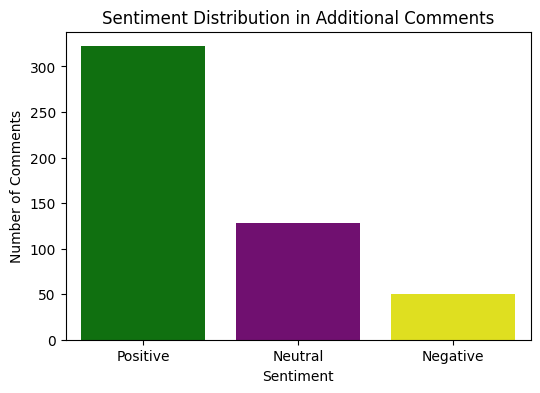

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='additional_comment_sentiment',
    data=data,
    order=['Positive', 'Neutral', 'Negative'],
    palette=['green','purple','yellow']
)
plt.title('Sentiment Distribution in Additional Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()


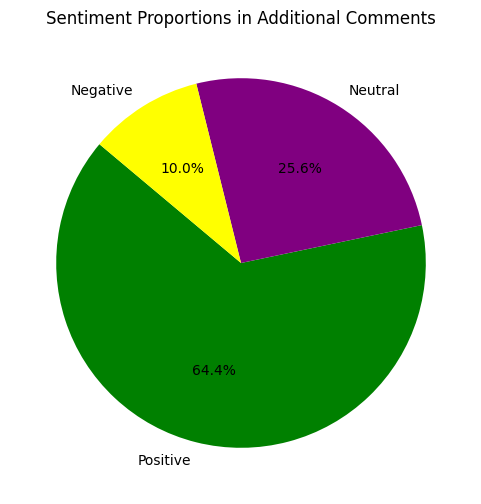

In [11]:
sentiment_counts = data['additional_comment_sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    colors=['green','purple','yellow'],
    startangle=140
)
plt.title('Sentiment Proportions in Additional Comments')
plt.show()


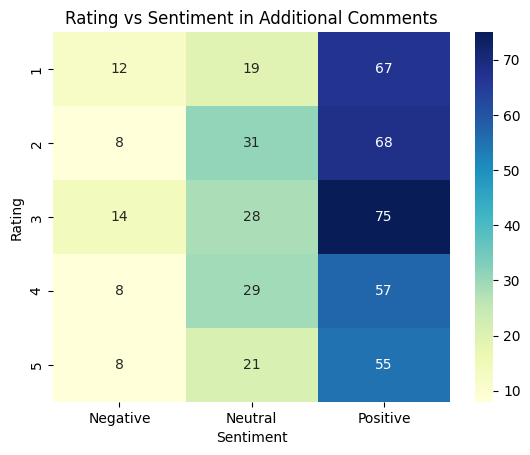

In [12]:
heat_data = pd.crosstab(data['Overall_Event_Rating'], data['additional_comment_sentiment'])
sns.heatmap(heat_data, annot=True, cmap='YlGnBu')
plt.title('Rating vs Sentiment in Additional Comments')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()


In [13]:
import plotly.express as px

fig = px.pie(
    values=sentiment_counts.values,
    names=sentiment_counts.index,
    title='Interactive Sentiment Proportions in Additional Comments',
    color_discrete_sequence=['yellow', 'green', 'red']
)
fig.update_traces(textinfo='percent+label', pull=[0.05, 0.05, 0.05])
fig.show()



In [14]:
fig = px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    color=sentiment_counts.index,
    color_discrete_sequence=['yellow', 'green', 'red'],
    title='Interactive Sentiment Distribution in Additional Comments',
    labels={'x': 'Sentiment', 'y': 'Number of Comments'}
)
fig.show()


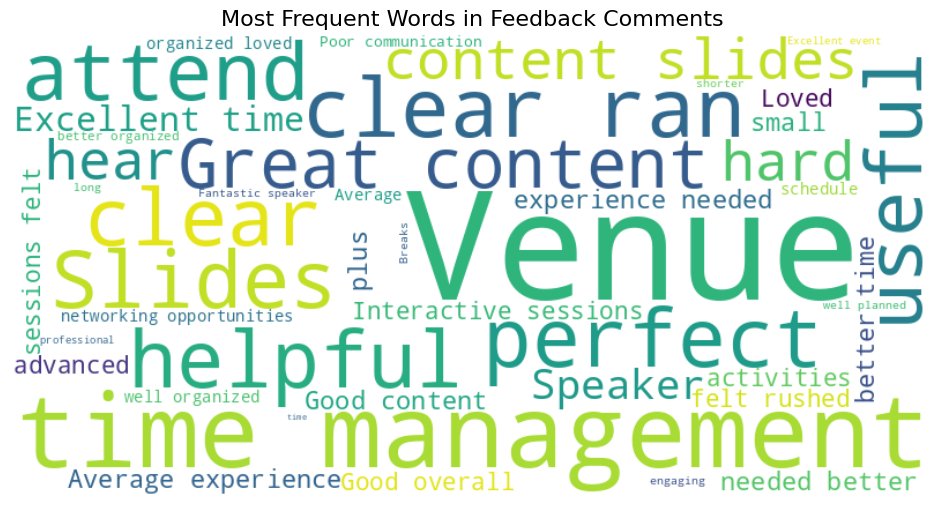

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all non-empty comments into one string
text = ' '.join(data['Additional_Comments'].dropna().astype(str))

# Generate a WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate(text)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Feedback Comments', fontsize=16)
plt.show()


5. **Suggest Improvements for future events**

a.	 **Improve Speaker Clarity**

Use better audio systems and guide speakers for clearer delivery.

b.	  **Fix Organizational Gaps**

Ensure smooth coordination, session timing, and flow.

c.	 **Make Content More Relevant**

Align topics with student interests through pre-event surveys.

d.	**Shorten and Structure Sessions**

Keep sessions concise and well-timed to avoid fatigue.

e.	 **Encourage Interactive Sessions**

Include Q&A, polls, and discussions to boost engagement.

f.	 **Segment by Academic Stream**

Offer parallel sessions tailored to different student backgrounds.

g.	 **Maintain Strengths**

Continue strong time management and organizational practices.

h.	**Collect and Apply Feedback**

Use real-time QR polls and follow up with visible improvements.
